In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

#  Veriyi Hazırlama

In [3]:
from ucimlrepo import fetch_ucirepo
credit=fetch_ucirepo(id=27)

In [4]:
credit

{'data': {'ids': None,
  'features':      A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
  0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
  1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
  2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
  3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
  4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
  ..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
  685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
  686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
  687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
  688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
  689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b
  
  [690 rows x 15 columns],
  'targets':     A16
  

In [5]:
pd.concat([credit['data']['features'],credit['data']['targets']],axis=1).to_csv("credit_data.csv",index=False)

In [6]:
data=pd.read_csv("credit_data.csv")

# Pandas Profiling

In [7]:
profile=ProfileReport(data)
profile.to_file("credit-profile.html")

C:\Users\busra\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile

In [9]:
data.isna().sum()

A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
A16     0
dtype: int64

In [10]:
data.isnull().sum()

A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
A16     0
dtype: int64

In [11]:
data.isna().mean()

A15    0.000000
A14    0.018841
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.000000
A9     0.000000
A8     0.000000
A7     0.013043
A6     0.013043
A5     0.008696
A4     0.008696
A3     0.000000
A2     0.017391
A1     0.017391
A16    0.000000
dtype: float64

In [12]:
data

A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1 A16
0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b   +
1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a   +
2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a   +
3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b   +
4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b   +
..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..  ..
685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b   -
686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a   -
687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a   -
688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b   -
689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b   -

[690 rows x 16 columns]

In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data['A16'].replace(to_replace={'+':1,'-':0},inplace=True)
import random
random.seed(9001)
values=[random.randint(0,len(data)) for p in range(0,100)]
for var in ['A3','A8','A9','A10']:
    data.loc[values,var]=np.nan

In [15]:
data

A15    A14 A13 A12  A11  A10   A9    A8  A7  A6 A5 A4      A3     A2 A1  \
0      0  202.0   g   f    1    t    t  1.25   v   w  g  u   0.000  30.83  b   
1    560   43.0   g   f    6    t    t  3.04   h   q  g  u   4.460  58.67  a   
2    824  280.0   g   f    0  NaN  NaN   NaN   h   q  g  u     NaN  24.50  a   
3      3  100.0   g   t    5    t    t  3.75   v   w  g  u   1.540  27.83  b   
4      0  120.0   s   f    0    f    t  1.71   v   w  g  u   5.625  20.17  b   
..   ...    ...  ..  ..  ...  ...  ...   ...  ..  .. .. ..     ...    ... ..   
685    0  260.0   g   f    0    f    f  1.25   h   e  p  y  10.085  21.08  b   
686  394  200.0   g   t    2    t    f  2.00   v   c  g  u   0.750  22.67  a   
687    1  200.0   g   t    1    t    f  2.00  ff  ff  p  y  13.500  25.25  a   
688  750  280.0   g   f    0    f    f  0.04   v  aa  g  u   0.205  17.92  b   
689    0    0.0   g   t    0    f    f  8.29   h   c  g  u   3.375  35.00  b   

     A16  
0      1  
1      1  
2      1  
3      1  
4      1  
..   ...  
685    0  
686    0  
687    0  
688    0  
689    0  

[690 rows x 16 columns]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     598 non-null    object 
 6   A9      598 non-null    object 
 7   A8      598 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      598 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


In [17]:
data.to_csv("credit_nan.csv",index=False)

In [18]:
data=pd.read_csv("credit_nan.csv")

In [19]:
data

A15    A14 A13 A12  A11  A10   A9    A8  A7  A6 A5 A4      A3     A2 A1  \
0      0  202.0   g   f    1    t    t  1.25   v   w  g  u   0.000  30.83  b   
1    560   43.0   g   f    6    t    t  3.04   h   q  g  u   4.460  58.67  a   
2    824  280.0   g   f    0  NaN  NaN   NaN   h   q  g  u     NaN  24.50  a   
3      3  100.0   g   t    5    t    t  3.75   v   w  g  u   1.540  27.83  b   
4      0  120.0   s   f    0    f    t  1.71   v   w  g  u   5.625  20.17  b   
..   ...    ...  ..  ..  ...  ...  ...   ...  ..  .. .. ..     ...    ... ..   
685    0  260.0   g   f    0    f    f  1.25   h   e  p  y  10.085  21.08  b   
686  394  200.0   g   t    2    t    f  2.00   v   c  g  u   0.750  22.67  a   
687    1  200.0   g   t    1    t    f  2.00  ff  ff  p  y  13.500  25.25  a   
688  750  280.0   g   f    0    f    f  0.04   v  aa  g  u   0.205  17.92  b   
689    0    0.0   g   t    0    f    f  8.29   h   c  g  u   3.375  35.00  b   

     A16  
0      1  
1      1  
2      1  
3      1  
4      1  
..   ...  
685    0  
686    0  
687    0  
688    0  
689    0  

[690 rows x 16 columns]

In [20]:
data.isna().sum()

A15     0
A14    13
A13     0
A12     0
A11     0
A10    92
A9     92
A8     92
A7      9
A6      9
A5      6
A4      6
A3     92
A2     12
A1     12
A16     0
dtype: int64

In [21]:
data_clean=data.dropna()

In [22]:
print(f"Orjinal verinin boyutu:{data.shape[0]}")
print(f"Temizlenmiş verinin boyutu:{data_clean.shape[0]}")

Orjinal verinin boyutu:690
Temizlenmiş verinin boyutu:564


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer

In [24]:
x=data.drop('A16',axis=1)
y=data[['A16']]

In [25]:
x

A15    A14 A13 A12  A11  A10   A9    A8  A7  A6 A5 A4      A3     A2 A1
0      0  202.0   g   f    1    t    t  1.25   v   w  g  u   0.000  30.83  b
1    560   43.0   g   f    6    t    t  3.04   h   q  g  u   4.460  58.67  a
2    824  280.0   g   f    0  NaN  NaN   NaN   h   q  g  u     NaN  24.50  a
3      3  100.0   g   t    5    t    t  3.75   v   w  g  u   1.540  27.83  b
4      0  120.0   s   f    0    f    t  1.71   v   w  g  u   5.625  20.17  b
..   ...    ...  ..  ..  ...  ...  ...   ...  ..  .. .. ..     ...    ... ..
685    0  260.0   g   f    0    f    f  1.25   h   e  p  y  10.085  21.08  b
686  394  200.0   g   t    2    t    f  2.00   v   c  g  u   0.750  22.67  a
687    1  200.0   g   t    1    t    f  2.00  ff  ff  p  y  13.500  25.25  a
688  750  280.0   g   f    0    f    f  0.04   v  aa  g  u   0.205  17.92  b
689    0    0.0   g   t    0    f    f  8.29   h   c  g  u   3.375  35.00  b

[690 rows x 15 columns]

In [26]:
y

A16
0      1
1      1
2      1
3      1
4      1
..   ...
685    0
686    0
687    0
688    0
689    0

[690 rows x 1 columns]

In [27]:
type(y)

pandas.core.frame.DataFrame

In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((483, 15), (207, 15), (483, 1), (207, 1))

In [29]:
X_train.isnull().mean()

A15    0.000000
A14    0.014493
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.140787
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.140787
A2     0.022774
A1     0.008282
dtype: float64

In [30]:
X_train.dtypes

A15      int64
A14    float64
A13     object
A12     object
A11      int64
A10     object
A9      object
A8     float64
A7      object
A6      object
A5      object
A4      object
A3     float64
A2     float64
A1      object
dtype: object

In [31]:
num_variables=X_train.select_dtypes(include=[np.float64,np.int64]).columns
num_variables
type(num_variables)

Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')

pandas.core.indexes.base.Index

In [32]:
for var in num_variables:
    median=X_train[var].median()
    X_train[var].fillna(median,inplace=True)
    X_test[var].fillna(median,inplace=True)
X_train.isna().sum()

A15     0
A14     0
A13     0
A12     0
A11     0
A10    68
A9     68
A8      0
A7      4
A6      4
A5      4
A4      4
A3      0
A2      0
A1      4
dtype: int64

In [33]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train[num_variables])
imputer.statistics_

SimpleImputer(strategy='median')

array([  6.   , 160.   ,   0.   ,   1.   ,   2.75 ,  28.835])

In [34]:
X_train

A15    A14 A13 A12  A11 A10 A9      A8  A7  A6 A5 A4     A3     A2 A1
596  4159  396.0   g   t    8   t  t   2.375   v   c  g  u  3.000  46.08  a
303     0  120.0   g   f    0   f  f   0.085   v   q  g  u  2.875  15.92  a
204  1187   50.0   g   f    1   t  t   0.085   v   w  p  y  2.125  36.33  b
351     0  100.0   g   f    0   f  f   0.000  ff  ff  p  y  0.585  22.17  b
118  1332  360.0   g   t    6   t  t  14.000   v   m  g  u  7.040  57.83  b
..    ...    ...  ..  ..  ...  .. ..     ...  ..  .. .. ..    ...    ... ..
359     0  160.0   g   f    0   f  f   0.000  ff  ff  g  u  4.710  36.75  a
192   600  510.0   g   f    0   f  t   2.500   v   x  g  u  0.960  41.75  b
629     5  220.0   g   f    0   f  f   1.665   v   w  g  u  0.665  19.58  a
559  2384  140.0   g   t    7   t  t   2.290   h   q  g  u  2.290  22.83  a
684     0  400.0   s   t    0   f  f   3.500   v   m  g  u  3.290  40.58  b

[483 rows x 15 columns]

In [35]:
X_train[num_variables]=imputer.transform(X_train[num_variables])
X_test[num_variables]=imputer.transform(X_test[num_variables])

In [36]:
X_train.isna().mean()

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.000000
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.000000
A2     0.000000
A1     0.008282
dtype: float64

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [38]:
#Sklearn çıktıları genellikle numpy array olarak döndürülmektedir. pandas için bu ayarlar değişebilir
from sklearn import set_config
set_config(transform_output='pandas')

In [39]:
num_imputer=SimpleImputer(strategy="median")
preprocessor=ColumnTransformer(transformers=[
    ('median_imputer',num_imputer,num_variables)],remainder='passthrough')


X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object'))])

In [40]:
X_train=preprocessor.transform(X_train)
X_test=preprocessor.transform(X_test)

In [41]:
X_train.isnull().sum()

median_imputer__A15     0
median_imputer__A14     0
median_imputer__A11     0
median_imputer__A8      0
median_imputer__A3      0
median_imputer__A2      0
remainder__A13          0
remainder__A12          0
remainder__A10         68
remainder__A9          68
remainder__A7           4
remainder__A6           4
remainder__A5           4
remainder__A4           4
remainder__A1           4
dtype: int64

In [42]:
X_train.tail()

median_imputer__A15  median_imputer__A14  median_imputer__A11  \
359                  0.0                160.0                  0.0   
192                600.0                510.0                  0.0   
629                  5.0                220.0                  0.0   
559               2384.0                140.0                  7.0   
684                  0.0                400.0                  0.0   

     median_imputer__A8  median_imputer__A3  median_imputer__A2  \
359               0.000               4.710               36.75   
192               2.500               0.960               41.75   
629               1.665               0.665               19.58   
559               2.290               2.290               22.83   
684               3.500               3.290               40.58   

    remainder__A13 remainder__A12 remainder__A10 remainder__A9 remainder__A7  \
359              g              f              f             f            ff   
192              g              f              f             t             v   
629              g              f              f             f             v   
559              g              t              t             t             h   
684              s              t              f             f             v   

    remainder__A6 remainder__A5 remainder__A4 remainder__A1  
359            ff             g             u             a  
192             x             g             u             b  
629             w             g             u             a  
559             q             g             u             a  
684             m             g             u             b

In [43]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
ImputerEngine=MeanMedianImputer(imputation_method="median",variables=num_variables.to_list())
ImputerEngine.fit(X_train)

MeanMedianImputer(variables=['A15', 'A14', 'A11', 'A8', 'A3', 'A2'])

In [44]:
ImputerEngine.imputer_dict_

{'A15': 6.0, 'A14': 160.0, 'A11': 0.0, 'A8': 1.0, 'A3': 2.75, 'A2': 28.835}

In [45]:
X_train=ImputerEngine.transform(X_train)
X_test=ImputerEngine.transform(X_test)
X_train.isna().mean()

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.000000
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.000000
A2     0.000000
A1     0.008282
dtype: float64

In [46]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
kategorik_var=X_train.select_dtypes(exclude=[np.float64,np.int64]).columns

In [47]:
kategorik_var

Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')

In [48]:
for var in num_variables:
    median=X_train[var].median()
    X_train[var].fillna(median,inplace=True)
    X_test[var].fillna(median,inplace=True)
X_train.isna().sum()

A15     0
A14     0
A13     0
A12     0
A11     0
A10    68
A9     68
A8      0
A7      4
A6      4
A5      4
A4      4
A3      0
A2      0
A1      4
dtype: int64

In [49]:
X_train[kategorik_var].isnull().sum()

A13     0
A12     0
A10    68
A9     68
A7      4
A6      4
A5      4
A4      4
A1      4
dtype: int64

In [50]:
for var in kategorik_var:
    mode=X_train[var].mode()[0]
    X_train[var].fillna(mode,inplace=True)
    X_test[var].fillna(mode,inplace=True)

In [51]:
X_train.isna().mean()

A15    0.0
A14    0.0
A13    0.0
A12    0.0
A11    0.0
A10    0.0
A9     0.0
A8     0.0
A7     0.0
A6     0.0
A5     0.0
A4     0.0
A3     0.0
A2     0.0
A1     0.0
dtype: float64

In [52]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

kategorik_imputer=SimpleImputer(strategy='most_frequent')
preprocessor=ColumnTransformer(transformers=[('kategorik_imputer',kategorik_imputer,kategorik_var)],remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('kategorik_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object'))])

In [53]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('kategorik_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object'))])

In [54]:
X_train=preprocessor.transform(X_train)
X_test=preprocessor.transform(X_test)

In [55]:
X_train.isnull().mean()

kategorik_imputer__A13    0.000000
kategorik_imputer__A12    0.000000
kategorik_imputer__A10    0.000000
kategorik_imputer__A9     0.000000
kategorik_imputer__A7     0.000000
kategorik_imputer__A6     0.000000
kategorik_imputer__A5     0.000000
kategorik_imputer__A4     0.000000
kategorik_imputer__A1     0.000000
remainder__A15            0.000000
remainder__A14            0.014493
remainder__A11            0.000000
remainder__A8             0.140787
remainder__A3             0.140787
remainder__A2             0.022774
dtype: float64

In [56]:
from feature_engine.imputation import CategoricalImputer
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

ImputerEngine=CategoricalImputer(imputation_method='frequent',variables=kategorik_var.to_list())

In [57]:
ImputerEngine.fit(X_train)
ImputerEngine.imputer_dict_

CategoricalImputer(imputation_method='frequent',
                   variables=['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4',
                              'A1'])

{'A13': 'g',
 'A12': 'f',
 'A10': 'f',
 'A9': 't',
 'A7': 'v',
 'A6': 'c',
 'A5': 'g',
 'A4': 'u',
 'A1': 'b'}

In [58]:
X_train=ImputerEngine.transform(X_train)
X_test=ImputerEngine.transform(X_test)
X_train.isna().mean()

A15    0.000000
A14    0.014493
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.000000
A9     0.000000
A8     0.140787
A7     0.000000
A6     0.000000
A5     0.000000
A4     0.000000
A3     0.140787
A2     0.022774
A1     0.000000
dtype: float64

In [59]:
kategorik_imputer=SimpleImputer(strategy='constant',fill_value='missing')
sayisal_imputer=SimpleImputer(strategy='constant',fill_value=1000)

clf=ColumnTransformer(transformers=[('num_imputer',sayisal_imputer,num_variables),
                                    ('kategorik_imputer',kategorik_imputer,kategorik_var)],remainder='passthrough')

In [60]:
clf

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_imputer',
                                 SimpleImputer(fill_value=1000,
                                               strategy='constant'),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')),
                                ('kategorik_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object'))])

In [61]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

clf.fit(X_train)
X_train=clf.transform(X_train)
X_test=clf.transform(X_test)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_imputer',
                                 SimpleImputer(fill_value=1000,
                                               strategy='constant'),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')),
                                ('kategorik_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object'))])

In [62]:
(X_train=='missing').sum()

num_imputer__A15           0
num_imputer__A14           0
num_imputer__A11           0
num_imputer__A8            0
num_imputer__A3            0
num_imputer__A2            0
kategorik_imputer__A13     0
kategorik_imputer__A12     0
kategorik_imputer__A10    64
kategorik_imputer__A9     64
kategorik_imputer__A7      7
kategorik_imputer__A6      7
kategorik_imputer__A5      6
kategorik_imputer__A4      6
kategorik_imputer__A1      9
dtype: int64

In [63]:
(X_train==1000).sum()

num_imputer__A15           7
num_imputer__A14          12
num_imputer__A11           0
num_imputer__A8           64
num_imputer__A3           64
num_imputer__A2            6
kategorik_imputer__A13     0
kategorik_imputer__A12     0
kategorik_imputer__A10     0
kategorik_imputer__A9      0
kategorik_imputer__A7      0
kategorik_imputer__A6      0
kategorik_imputer__A5      0
kategorik_imputer__A4      0
kategorik_imputer__A1      0
dtype: int64

In [64]:
from feature_engine.imputation import ArbitraryNumberImputer

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
ImputerEngine=ArbitraryNumberImputer(arbitrary_number=9999, variables=num_variables.to_list())
ImputerEngine.fit(X_train)
ImputerEngine.imputer_dict_

ArbitraryNumberImputer(arbitrary_number=9999,
                       variables=['A15', 'A14', 'A11', 'A8', 'A3', 'A2'])

{'A15': 9999, 'A14': 9999, 'A11': 9999, 'A8': 9999, 'A3': 9999, 'A2': 9999}

In [65]:
X_train=ImputerEngine.transform(X_train)
X_test=ImputerEngine.transform(X_test)

In [66]:
(X_train==9999).sum()

A15     0
A14    12
A13     0
A12     0
A11     0
A10     0
A9      0
A8     64
A7      0
A6      0
A5      0
A4      0
A3     64
A2      6
A1      0
dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

empty_a10_index=X_train[X_train.A10.isna()==True].index
empty_a14_index=X_train[X_train['A14'].isna()==True].index

empty_a10_index
empty_a14_index

Index([313, 315, 526, 436, 243, 602, 552, 401, 623, 225, 503, 564, 466, 298,
       331, 309,  60, 422, 262, 167, 630, 308,   5, 497, 620, 284, 238, 384,
       405, 253, 357,  69,   2, 221, 647, 176, 582,  44,  27, 259, 434, 577,
       583, 438, 525, 507, 228, 117, 528, 450, 296, 226, 607, 275, 649,  80,
       377, 512, 387, 256, 430, 119, 442, 650, 128, 543, 659, 551],
      dtype='int64')

Index([206, 243, 270, 626, 592, 445, 622], dtype='int64')

In [68]:
from feature_engine.imputation import RandomSampleImputer

ImputerEngine=RandomSampleImputer(random_state=0)

ImputerEngine.fit(X_train)
X_train=ImputerEngine.transform(X_train)
X_test=ImputerEngine.transform(X_test)

RandomSampleImputer(random_state=0)

In [69]:
X_train.isnull().sum()

A15    0
A14    0
A13    0
A12    0
A11    0
A10    0
A9     0
A8     0
A7     0
A6     0
A5     0
A4     0
A3     0
A2     0
A1     0
dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

from feature_engine.imputation import AddMissingIndicator

ImputerEngine=AddMissingIndicator()
ImputerEngine.fit(X_train)
X_train=ImputerEngine.transform(X_train)
X_test=ImputerEngine.transform(X_test)

AddMissingIndicator()

In [71]:
X_train.isnull().mean()

A15       0.000000
A14       0.014493
A13       0.000000
A12       0.000000
A11       0.000000
A10       0.140787
A9        0.140787
A8        0.140787
A7        0.008282
A6        0.008282
A5        0.008282
A4        0.008282
A3        0.140787
A2        0.022774
A1        0.008282
A14_na    0.000000
A10_na    0.000000
A9_na     0.000000
A8_na     0.000000
A7_na     0.000000
A6_na     0.000000
A5_na     0.000000
A4_na     0.000000
A3_na     0.000000
A2_na     0.000000
A1_na     0.000000
dtype: float64

In [72]:
X_train

A15    A14 A13 A12  A11 A10 A9      A8  A7  A6  ... A10_na A9_na  A8_na  \
596  4159  396.0   g   t    8   t  t   2.375   v   c  ...      0     0      0   
303     0  120.0   g   f    0   f  f   0.085   v   q  ...      0     0      0   
204  1187   50.0   g   f    1   t  t   0.085   v   w  ...      0     0      0   
351     0  100.0   g   f    0   f  f   0.000  ff  ff  ...      0     0      0   
118  1332  360.0   g   t    6   t  t  14.000   v   m  ...      0     0      0   
..    ...    ...  ..  ..  ...  .. ..     ...  ..  ..  ...    ...   ...    ...   
359     0  160.0   g   f    0   f  f   0.000  ff  ff  ...      0     0      0   
192   600  510.0   g   f    0   f  t   2.500   v   x  ...      0     0      0   
629     5  220.0   g   f    0   f  f   1.665   v   w  ...      0     0      0   
559  2384  140.0   g   t    7   t  t   2.290   h   q  ...      0     0      0   
684     0  400.0   s   t    0   f  f   3.500   v   m  ...      0     0      0   

     A7_na A6_na  A5_na  A4_na  A3_na  A2_na  A1_na  
596      0     0      0      0      0      0      0  
303      0     0      0      0      0      0      0  
204      0     0      0      0      0      0      0  
351      0     0      0      0      0      0      0  
118      0     0      0      0      0      0      0  
..     ...   ...    ...    ...    ...    ...    ...  
359      0     0      0      0      0      0      0  
192      0     0      0      0      0      0      0  
629      0     0      0      0      0      0      0  
559      0     0      0      0      0      0      0  
684      0     0      0      0      0      0      0  

[483 rows x 26 columns]

In [73]:
from sklearn.impute import MissingIndicator
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

indicator=MissingIndicator()
indicator.fit(X_train)
mi_train = indicator.transform(X_train)
X_train = pd.concat([X_train, mi_train], axis=1)
X_train.replace(to_replace={True:1, False:0})

MissingIndicator()

A15    A14 A13 A12  A11 A10 A9      A8  A7  A6  ...  \
596  4159  396.0   g   t    8   t  t   2.375   v   c  ...   
303     0  120.0   g   f    0   f  f   0.085   v   q  ...   
204  1187   50.0   g   f    1   t  t   0.085   v   w  ...   
351     0  100.0   g   f    0   f  f   0.000  ff  ff  ...   
118  1332  360.0   g   t    6   t  t  14.000   v   m  ...   
..    ...    ...  ..  ..  ...  .. ..     ...  ..  ..  ...   
359     0  160.0   g   f    0   f  f   0.000  ff  ff  ...   
192   600  510.0   g   f    0   f  t   2.500   v   x  ...   
629     5  220.0   g   f    0   f  f   1.665   v   w  ...   
559  2384  140.0   g   t    7   t  t   2.290   h   q  ...   
684     0  400.0   s   t    0   f  f   3.500   v   m  ...   

    missingindicator_A10 missingindicator_A9  missingindicator_A8  \
596                    0                   0                    0   
303                    0                   0                    0   
204                    0                   0                    0   
351                    0                   0                    0   
118                    0                   0                    0   
..                   ...                 ...                  ...   
359                    0                   0                    0   
192                    0                   0                    0   
629                    0                   0                    0   
559                    0                   0                    0   
684                    0                   0                    0   

     missingindicator_A7 missingindicator_A6  missingindicator_A5  \
596                    0                   0                    0   
303                    0                   0                    0   
204                    0                   0                    0   
351                    0                   0                    0   
118                    0                   0                    0   
..                   ...                 ...                  ...   
359                    0                   0                    0   
192                    0                   0                    0   
629                    0                   0                    0   
559                    0                   0                    0   
684                    0                   0                    0   

     missingindicator_A4  missingindicator_A3  missingindicator_A2  \
596                    0                    0                    0   
303                    0                    0                    0   
204                    0                    0                    0   
351                    0                    0                    0   
118                    0                    0                    0   
..                   ...                  ...                  ...   
359                    0                    0                    0   
192                    0                    0                    0   
629                    0                    0                    0   
559                    0                    0                    0   
684                    0                    0                    0   

     missingindicator_A1  
596                    0  
303                    0  
204                    0  
351                    0  
118                    0  
..                   ...  
359                    0  
192                    0  
629                    0  
559                    0  
684                    0  

[483 rows x 26 columns]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

X_train['A14'][206]

from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)

imputer.fit(X_train[num_variables])
imputer.feature_names_in_

nan

KNNImputer()

array(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype=object)

In [75]:
X_train[num_variables]=imputer.transform(X_train[num_variables])
X_test[num_variables]=imputer.transform(X_test[num_variables])

In [76]:
X_train['A14'][206]

331.8

In [77]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

X_train.A14[206]


nan

In [78]:
from sklearn.linear_model import BayesianRidge
imputer=IterativeImputer(estimator=BayesianRidge(),initial_strategy='mean',random_state=0)
imputer
imputer.fit(X_train[num_variables])
X_train[num_variables]=imputer.transform(X_train[num_variables])
X_test[num_variables]=imputer.transform(X_test[num_variables])

IterativeImputer(estimator=BayesianRidge(), random_state=0)

IterativeImputer(estimator=BayesianRidge(), random_state=0)

In [79]:
X_train.A14[206]

191.35808023107612

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

imputer_dct=IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),initial_strategy='mean',max_iter=100,random_state=0)
imputer_ext=IterativeImputer(estimator=ExtraTreesRegressor(random_state=0),initial_strategy='mean',max_iter=100,random_state=0)
imputer_knn=IterativeImputer(estimator=KNeighborsRegressor(),initial_strategy='mean',max_iter=100,random_state=0)

imputer_dct.fit(X_train[num_variables])
imputer_ext.fit(X_train[num_variables])
imputer_knn.fit(X_train[num_variables])

X_train_dct=imputer_dct.transform(X_train[num_variables])
X_test_dct=imputer_dct.transform(X_test[num_variables])
X_train_dct.A14[[206]]

X_train_ext=imputer_ext.transform(X_train[num_variables])
X_test_ext=imputer_ext.transform(X_test[num_variables])
X_train_ext.A14[[206]]

X_train_knn=imputer_knn.transform(X_train[num_variables])
X_test_knn=imputer_knn.transform(X_test[num_variables])
X_train_knn.A14[[206]]

IterativeImputer(estimator=DecisionTreeRegressor(random_state=0), max_iter=100,
                 random_state=0)

IterativeImputer(estimator=ExtraTreesRegressor(random_state=0), max_iter=100,
                 random_state=0)

IterativeImputer(estimator=KNeighborsRegressor(), max_iter=100, random_state=0)

206    0.0
Name: A14, dtype: float64

206    106.7
Name: A14, dtype: float64

206    114.0
Name: A14, dtype: float64

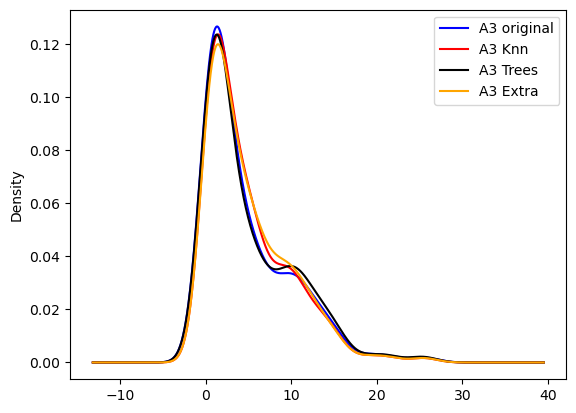

In [82]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_dct['A3'].plot(kind='kde', ax=ax, color='black')
X_train_ext['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 Knn', 'A3 Trees', 'A3 Extra']
ax.legend(lines, labels, loc='best')

plt.show();

In [84]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [89]:
kategorik_imputer1=SimpleImputer(strategy='constant',fill_value='missing')
kategorik_imputer2=SimpleImputer(strategy='most_frequent')

sayisal_imputer1=SimpleImputer(strategy='constant',fill_value=9999)
sayisal_imputer2=SimpleImputer(strategy='mean')
sayisal_imputer3=IterativeImputer(estimator=KNeighborsRegressor(),initial_strategy='mean',max_iter=100,random_state=0)

clt=ColumnTransformer(transformers=[
    ('kategorik_imputer1',kategorik_imputer1,kategorik_var),
    ('kategorik_imputer2',kategorik_imputer2,kategorik_var),
    ('sayisal_imputer1',sayisal_imputer1,num_variables),
    ('sayisal_imputer2',sayisal_imputer2,num_variables),
    ('sayisal_imputer3',sayisal_imputer3,num_variables),],remainder='passthrough')
clt.fit(X_train)

X_train=clt.transform(X_train)
X_test=clt.transform(X_test)

X_train.isnull().sum()

D:\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('kategorik_imputer1',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')),
                                ('kategorik_imputer2',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')),
                                ('sayisa...
                                 SimpleImputer(fill_value=9999,
                                               strategy='constant'),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')),
                                ('sayisal_imputer2', SimpleImputer(),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')),
                                ('sayisal_imputer3',
                                 IterativeImputer(estimator=KNeighborsRegressor(),
                                                  max_iter=100,
                                                  random_state=0),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object'))])

kategorik_imputer1__A13    0
kategorik_imputer1__A12    0
kategorik_imputer1__A10    0
kategorik_imputer1__A9     0
kategorik_imputer1__A7     0
kategorik_imputer1__A6     0
kategorik_imputer1__A5     0
kategorik_imputer1__A4     0
kategorik_imputer1__A1     0
kategorik_imputer2__A13    0
kategorik_imputer2__A12    0
kategorik_imputer2__A10    0
kategorik_imputer2__A9     0
kategorik_imputer2__A7     0
kategorik_imputer2__A6     0
kategorik_imputer2__A5     0
kategorik_imputer2__A4     0
kategorik_imputer2__A1     0
sayisal_imputer1__A15      0
sayisal_imputer1__A14      0
sayisal_imputer1__A11      0
sayisal_imputer1__A8       0
sayisal_imputer1__A3       0
sayisal_imputer1__A2       0
sayisal_imputer2__A15      0
sayisal_imputer2__A14      0
sayisal_imputer2__A11      0
sayisal_imputer2__A8       0
sayisal_imputer2__A3       0
sayisal_imputer2__A2       0
sayisal_imputer3__A15      0
sayisal_imputer3__A14      0
sayisal_imputer3__A11      0
sayisal_imputer3__A8       0
sayisal_impute

In [90]:
X_train.head()

kategorik_imputer1__A13 kategorik_imputer1__A12 kategorik_imputer1__A10  \
178                       g                       f                       t   
265                       g                       f                       f   
352                       g                       t                       f   
529                       g                       f                       t   
409                       g                       f                       t   

    kategorik_imputer1__A9 kategorik_imputer1__A7 kategorik_imputer1__A6  \
178                      t                      v                      q   
265                      f                      v                      c   
352                      f                      v                      m   
529                      t                      h                      q   
409                      f                      v                      q   

    kategorik_imputer1__A5 kategorik_imputer1__A4 kategorik_imputer1__A1  \
178                      g                      u                      a   
265                      p                      y                      b   
352                      p                      y                      b   
529                      g                      u                      b   
409                      g                      u                      b   

    kategorik_imputer2__A13  ... sayisal_imputer2__A11 sayisal_imputer2__A8  \
178                       g  ...                   4.0                1.210   
265                       g  ...                   0.0                0.040   
352                       g  ...                   0.0                1.500   
529                       g  ...                   1.0                0.210   
409                       g  ...                   4.0                0.335   

    sayisal_imputer2__A3 sayisal_imputer2__A2 sayisal_imputer3__A15  \
178                9.250                18.42                 540.0   
265                0.085                17.08                 722.0   
352               11.500                22.50                4000.0   
529               25.210                43.25                  90.0   
409                0.250                17.08                   8.0   

    sayisal_imputer3__A14 sayisal_imputer3__A11 sayisal_imputer3__A8  \
178                  60.0                   4.0                1.210   
265                 140.0                   0.0                0.040   
352                   0.0                   0.0                1.500   
529                 760.0                   1.0                0.210   
409                 160.0                   4.0                0.335   

     sayisal_imputer3__A3  sayisal_imputer3__A2  
178                 9.250                 18.42  
265                 0.085                 17.08  
352                11.500                 22.50  
529                25.210                 43.25  
409                 0.250                 17.08  

[5 rows x 36 columns]

In [91]:
X_train.columns

Index(['kategorik_imputer1__A13', 'kategorik_imputer1__A12',
       'kategorik_imputer1__A10', 'kategorik_imputer1__A9',
       'kategorik_imputer1__A7', 'kategorik_imputer1__A6',
       'kategorik_imputer1__A5', 'kategorik_imputer1__A4',
       'kategorik_imputer1__A1', 'kategorik_imputer2__A13',
       'kategorik_imputer2__A12', 'kategorik_imputer2__A10',
       'kategorik_imputer2__A9', 'kategorik_imputer2__A7',
       'kategorik_imputer2__A6', 'kategorik_imputer2__A5',
       'kategorik_imputer2__A4', 'kategorik_imputer2__A1',
       'sayisal_imputer1__A15', 'sayisal_imputer1__A14',
       'sayisal_imputer1__A11', 'sayisal_imputer1__A8', 'sayisal_imputer1__A3',
       'sayisal_imputer1__A2', 'sayisal_imputer2__A15',
       'sayisal_imputer2__A14', 'sayisal_imputer2__A11',
       'sayisal_imputer2__A8', 'sayisal_imputer2__A3', 'sayisal_imputer2__A2',
       'sayisal_imputer3__A15', 'sayisal_imputer3__A14',
       'sayisal_imputer3__A11', 'sayisal_imputer3__A8', 'sayisal_imputer3__A3

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [103]:
sayisal_imputer_3=IterativeImputer(estimator=KNeighborsRegressor(),
                                   initial_strategy='mean',
                                   max_iter=100, random_state=0)

preprocessor= ColumnTransformer(transformers=[
    ('sayisal_imputer_3', sayisal_imputer_3, num_variables[4:]),
],remainder='passthrough')


In [109]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline(steps=[
    ('ka_imputer_1', CategoricalImputer(imputation_method='frequent', variables=kategorik_var[:2].tolist()   )),
    ('ka_imputer_2', CategoricalImputer(imputation_method='missing', fill_value='Missing', variables=kategorik_var[2:].tolist()   )),
    ('sa_imputer_1', AddMissingIndicator(variables=num_variables[:2].tolist()   )),
    ('sa_imputer_2', MeanMedianImputer(imputation_method='median', variables=num_variables[4:].tolist()  )),
    ('sa_imputer_3', preprocessor)
])

pipeline.fit(X_train)
X_train = pipeline.transform(X_train)
X_test = pipeline.transform(X_test)
X_train.isna().sum()

Pipeline(steps=[('ka_imputer_1',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['A13', 'A12'])),
                ('ka_imputer_2',
                 CategoricalImputer(variables=['A10', 'A9', 'A7', 'A6', 'A5',
                                               'A4', 'A1'])),
                ('sa_imputer_1', AddMissingIndicator(variables=['A15', 'A14'])),
                ('sa_imputer_2', MeanMedianImputer(variables=['A3', 'A2'])),
                ('sa_imputer_3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sayisal_imputer_3',
                                                  IterativeImputer(estimator=KNeighborsRegressor(),
                                                                   max_iter=100,
                                                                   random_state=0),
                                                  Index(['A3', 'A2'], dtype='object'))]))])

sayisal_imputer_3__A3     0
sayisal_imputer_3__A2     0
remainder__A15            0
remainder__A14            7
remainder__A13            0
remainder__A12            0
remainder__A11            0
remainder__A10            0
remainder__A9             0
remainder__A8            68
remainder__A7             0
remainder__A6             0
remainder__A5             0
remainder__A4             0
remainder__A1             0
remainder__A14_na         0
dtype: int64

In [94]:
num_variables[4:]

Index(['A3', 'A2'], dtype='object')

In [95]:
num_variables[:2]

Index(['A15', 'A14'], dtype='object')

In [97]:
num_variables[:]

Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')

In [100]:
data['A15'].isnull().sum()

0